In [20]:
import pandas as pd
import requests
import time
import plotly as py
import plotly.graph_objs as go
from collections import Counter

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [12]:
attacks = pd.read_csv("attacks_ready_to_plot.csv", encoding='utf-8')



In [13]:
attacks.head()

,order_id,date_case,country,area,location,type,activity,species
0,6303.0,2018.06.25,USA,California,"Oceanside, San Diego County",Boating,Paddling,white shark
1,6302.0,2018.06.18,USA,Georgia,"St. Simon Island, Glynn County",Unprovoked,Standing,NaN
2,6301.0,2018.06.09,USA,Hawaii,"Habush, Oahu",Invalid,Surfing,NaN
3,6300.0,2018.06.08,AUSTRALIA,New South Wales,Arrawarra Headland,Unprovoked,Surfing,2 m shark
4,6299.0,2018.06.04,MEXICO,Colima,La Ticla,Provoked,Free diving,"tiger shark, 3m"


Text(0, 0.5, 'Year')

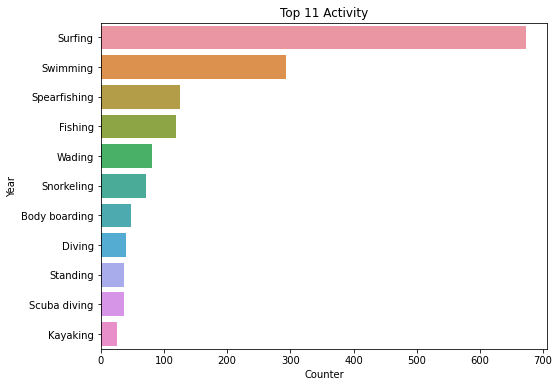

In [19]:
table_count = attacks['type'].value_counts()

table_count = Counter(attacks['activity'].dropna().tolist()).most_common(11)
table_count_index = [table[0] for table in table_count]
table_count_values = [table[1] for table in table_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = table_count_values, y=table_count_index,ax=ax,orient='h')
plt.title('Top 11 Activity')
plt.xlabel('Counter')
plt.ylabel('Year')

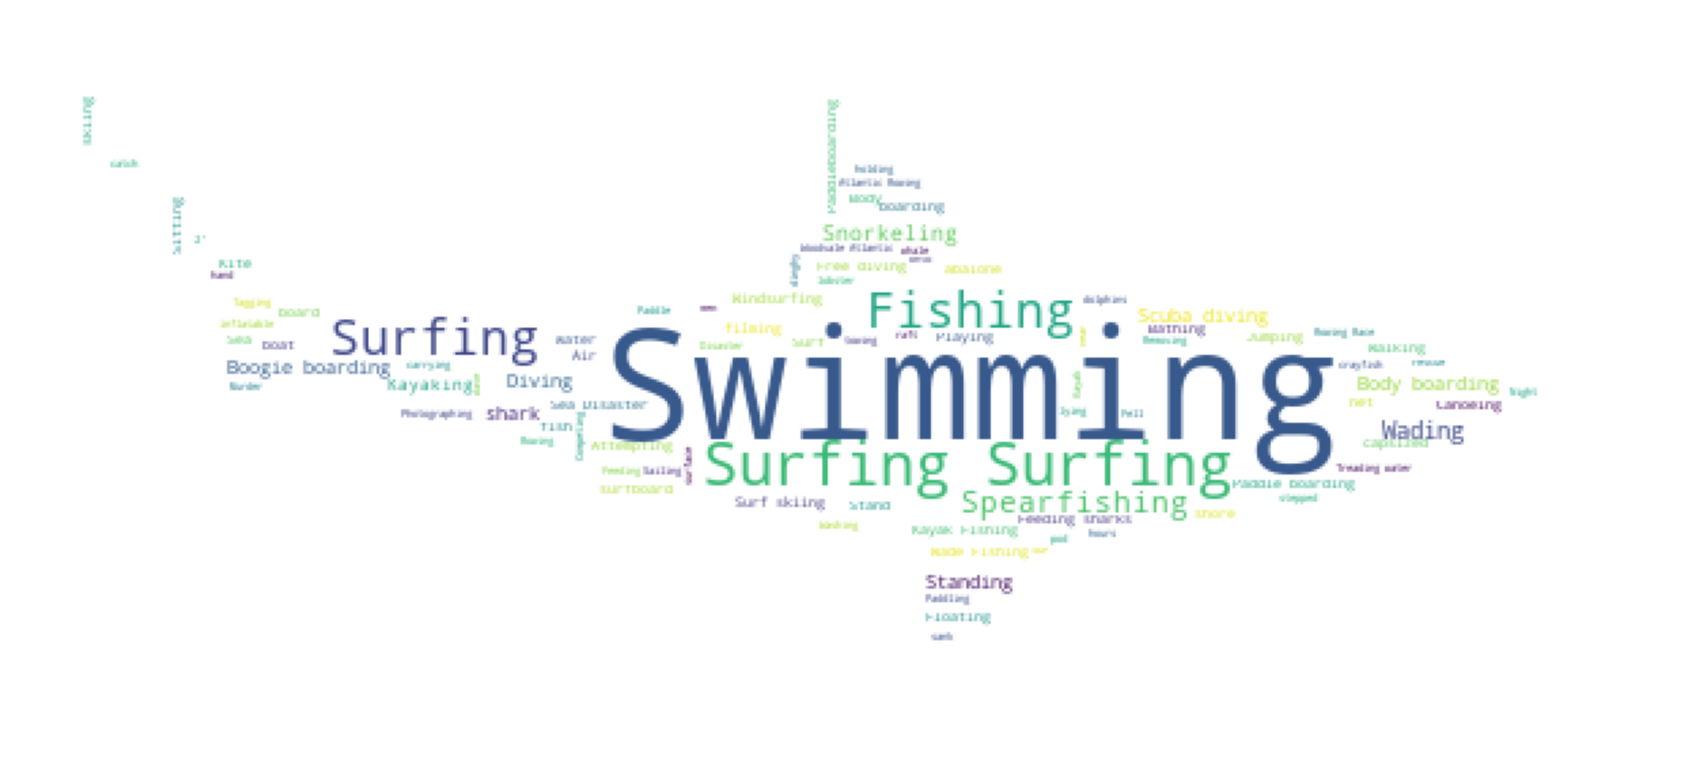

In [33]:
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

d = getcwd()
## join all documents in corpus
text = " ".join(attacks.activity.dropna().values)
## image from PublicDomainPictures.net
# https://image.shutterstock.com/image-vector/vector-silhouette-shark-260nw-378295468.jpg

mask = np.array(Image.open(path.join(d, "shark.png")))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[30,20])
plt.imshow(wc)
plt.axis("off")
_=plt.show()
